In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("salary.csv")


In [4]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='discipline', ylabel='salary'>

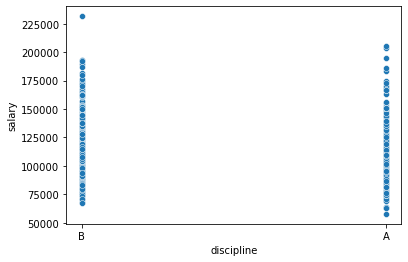

In [7]:
sns.scatterplot(x="discipline",y="salary",data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

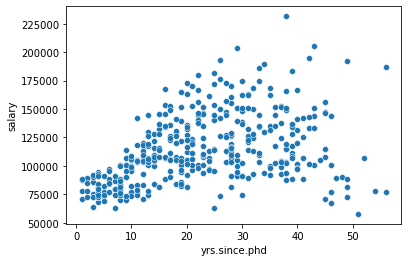

In [8]:
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

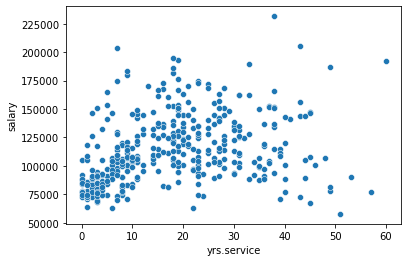

In [9]:
sns.scatterplot(x="yrs.service",y="salary",data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

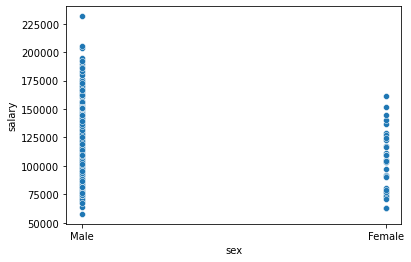

In [10]:
sns.scatterplot(x="sex",y="salary",data=df)

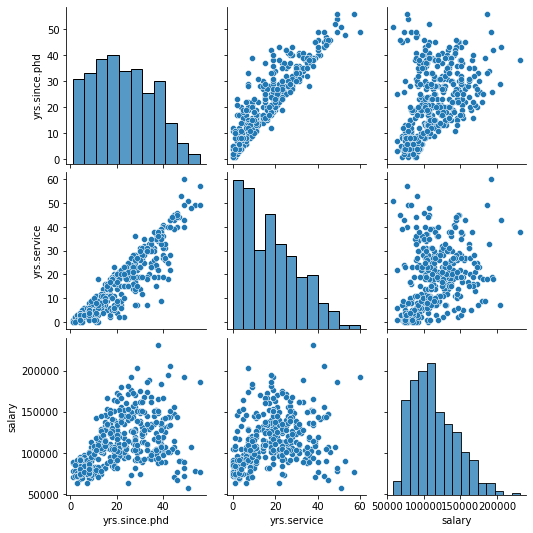

In [11]:
sns.pairplot(df)

# Checking Correlation

In [12]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [13]:
import matplotlib.pyplot as plt


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

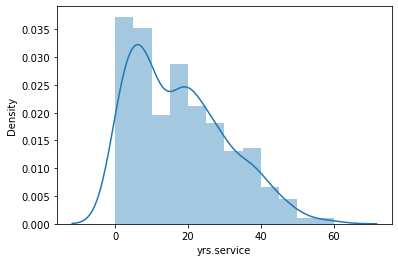

In [14]:
sns.distplot(df['yrs.service'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

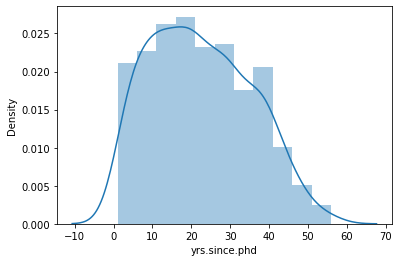

In [15]:
sns.distplot(df['yrs.since.phd'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

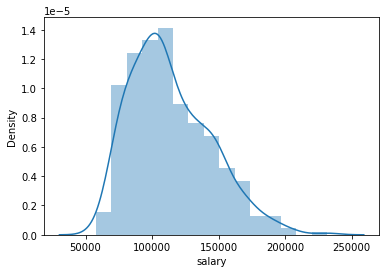

In [16]:
sns.distplot(df['salary'])

<AxesSubplot:>

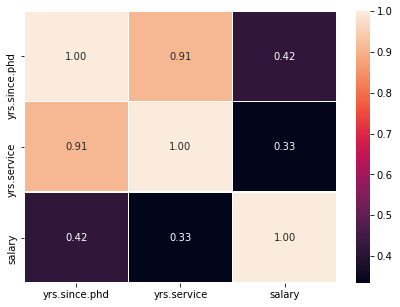

In [18]:
plt.figure(figsize =(7,5))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="white",fmt='.2f')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

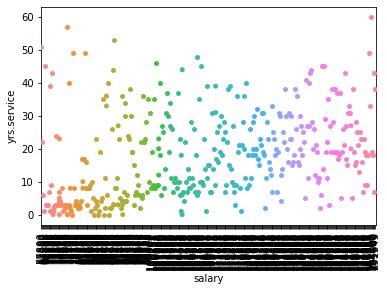

In [21]:
result=sns.stripplot(x="salary",y="yrs.service",data=df,jitter=True)
plt.xticks(rotation=90)

In [100]:
Y = df['salary']
X =df.drop(['salary','yrs.since.phd','rank','discipline','sex'], axis=1)

In [101]:
from scipy import stats
from sklearn.tree import DecisionTreeClassifier

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=1/3,random_state=0)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [103]:
Y_pred=reg.predict(X_test)

In [104]:
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)

LinearRegression(n_jobs=1)

In [105]:
print("Coefficients :\n",lm.coef_)

Coefficients :
 [1.]


In [106]:
prediction=lm.predict(X_test)

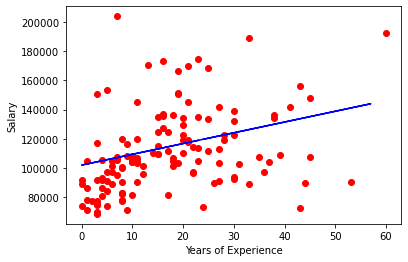

In [109]:
plt.scatter(X_test,Y_test, color='red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [110]:
from sklearn import metrics
print('Mean Absolute Error MAE :',metrics.mean_absolute_error(Y_test,prediction))
print('Mean Absolute Squared Error MSE :',metrics.mean_squared_error(Y_test,prediction))
print('Mean Absolute Squared Error TMSE:',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

Mean Absolute Error MAE : 110658.72180451128
Mean Absolute Squared Error MSE : 13026933657.44361
Mean Absolute Squared Error TMSE: 114135.59329781227


In [111]:
coff=pd.DataFrame(lm.coef_,X.columns)
coff.columns =['Coeffecient Value']
coff

,Coeffecient Value
yrs.service,1.0


# Making New Prediction for Experience as 40 Years

In [117]:
newsal=reg.predict([[40]])

In [118]:
newsal

array([131438.54625824])

# Making New Prediction for Experience as 4 Years

In [121]:
newsal=reg.predict([[19]])

In [120]:
newsal

array([104857.0185333])